<a href="https://colab.research.google.com/github/isabelemoura/Recognition-Fruit-Vegetable/blob/main/Fruit_and_Vegetable_Classification_TensorFlow_Model_for_Android_App.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Instalação do wget

In [1]:
!pip install wget


  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9657 sha256=61a953c1088ae0623ec43722d5a4865d472f8d978aa388f96f1e719bde986a67
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


#Instalação do Kaggle

In [2]:
!pip install kaggle


In [5]:
!mkdir -p ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


#Baixar os arquivos no Kaggle

In [6]:
!kaggle datasets download -d kritikseth/fruit-and-vegetable-image-recognition -p /content


100% 1.98G/1.98G [01:40<00:00, 23.3MB/s]
100% 1.98G/1.98G [01:40<00:00, 21.2MB/s]


#Descompactar o arquivo
Aqui a pasta terá o nome de dados, mas você pode alterar para o nome que quiser.


In [7]:
!unzip /content/fruit-and-vegetable-image-recognition.zip -d /content/Fruit_Vegetable_Recognition


Archive:  /content/fruit-and-vegetable-image-recognition.zip
  inflating: /content/Fruit_Vegetable_Recognition/test/apple/Image_1.jpg  
  inflating: /content/Fruit_Vegetable_Recognition/test/apple/Image_10.jpg  
  inflating: /content/Fruit_Vegetable_Recognition/test/apple/Image_2.jpg  
  inflating: /content/Fruit_Vegetable_Recognition/test/apple/Image_3.jpg  
  inflating: /content/Fruit_Vegetable_Recognition/test/apple/Image_4.jpg  
  inflating: /content/Fruit_Vegetable_Recognition/test/apple/Image_5.jpg  
  inflating: /content/Fruit_Vegetable_Recognition/test/apple/Image_6.JPG  
  inflating: /content/Fruit_Vegetable_Recognition/test/apple/Image_7.jpg  
  inflating: /content/Fruit_Vegetable_Recognition/test/apple/Image_8.jpg  
  inflating: /content/Fruit_Vegetable_Recognition/test/apple/Image_9.jpg  
  inflating: /content/Fruit_Vegetable_Recognition/test/banana/Image_1.jpg  
  inflating: /content/Fruit_Vegetable_Recognition/test/banana/Image_10.jpg  
  inflating: /content/Fruit_Vegetab

#Instalações para o projeto

In [8]:
import tensorflow as tf
import matplotlib.pyplot as plt
print(tf.__version__)

2.12.0


In [10]:
img_height, img_width = 32, 32
batch_size = 20

train_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/Fruit_Vegetable_Recognition/train",
    image_size = (img_height, img_width),
    batch_size = batch_size
)
val_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/Fruit_Vegetable_Recognition/validation",
    image_size = (img_height, img_width),
    batch_size = batch_size
)
test_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/Fruit_Vegetable_Recognition/test",
    image_size = (img_height, img_width),
    batch_size = batch_size
)


Found 3115 files belonging to 36 classes.
Found 351 files belonging to 36 classes.
Found 359 files belonging to 36 classes.


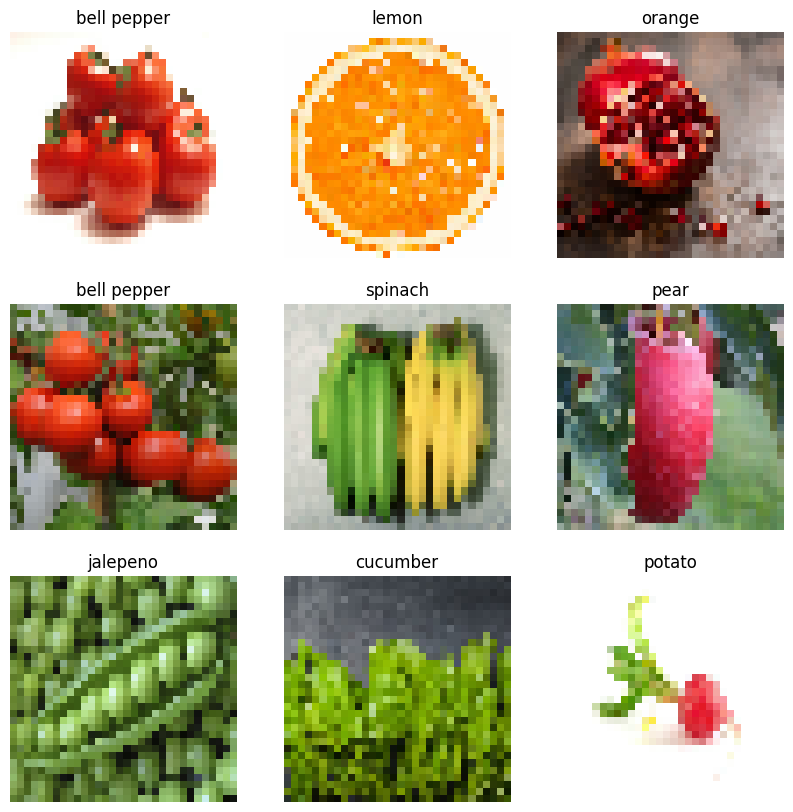

In [12]:
class_names = ['pear', 'spinach', 'kiwi', 'capsicum', 'sweetpotato', 'cabbage', 'onion',
'cauliflower', 'apple', 'ginger', 'garlic', 'eggplant', 'pomegranate', 'mango',
'peas', 'sweetcorn', 'carrot', 'soy beans', 'beetroot', 'lettuce', 'raddish',
'lemon', 'watermelon', 'grapes', 'jalepeno', 'corn', 'orange', 'turnip',
'potato', 'paprika', 'cucumber', 'tomato', 'banana', 'bell pepper',
'chilli pepper', 'pineapple']
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [15]:
model = tf.keras.Sequential(
    [
     tf.keras.layers.Rescaling(1./255),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(128, activation="relu"),
     tf.keras.layers.Dense(36)
    ]
)

In [16]:
model.compile(
    optimizer="adam",
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics=['accuracy']
)

In [17]:
model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = 32
)

Epoch 1/32
156/156 [==============================] - 78s 412ms/step - loss: 3.4108 - accuracy: 0.0568 - val_loss: 2.8047 - val_accuracy: 0.1652
Epoch 2/32
156/156 [==============================] - 65s 402ms/step - loss: 2.7628 - accuracy: 0.1839 - val_loss: 2.3748 - val_accuracy: 0.2678
Epoch 3/32
156/156 [==============================] - 65s 400ms/step - loss: 2.5016 - accuracy: 0.2523 - val_loss: 2.2116 - val_accuracy: 0.3048
Epoch 4/32
156/156 [==============================] - 72s 445ms/step - loss: 2.3381 - accuracy: 0.2860 - val_loss: 1.9506 - val_accuracy: 0.4274
Epoch 5/32
156/156 [==============================] - 66s 409ms/step - loss: 2.2173 - accuracy: 0.3204 - val_loss: 1.8170 - val_accuracy: 0.4615
Epoch 6/32
156/156 [==============================] - 66s 406ms/step - loss: 2.0936 - accuracy: 0.3583 - val_loss: 1.7487 - val_accuracy: 0.5014
Epoch 7/32
156/156 [==============================] - 66s 406ms/step - loss: 2.0382 - accuracy: 0.3714 - val_loss: 1.6381 - val_ac

In [18]:
model.evaluate(test_ds)

18/18 [==============================] - 10s 270ms/step - loss: 0.5496 - accuracy: 0.8663


[0.5495930910110474, 0.8662952780723572]

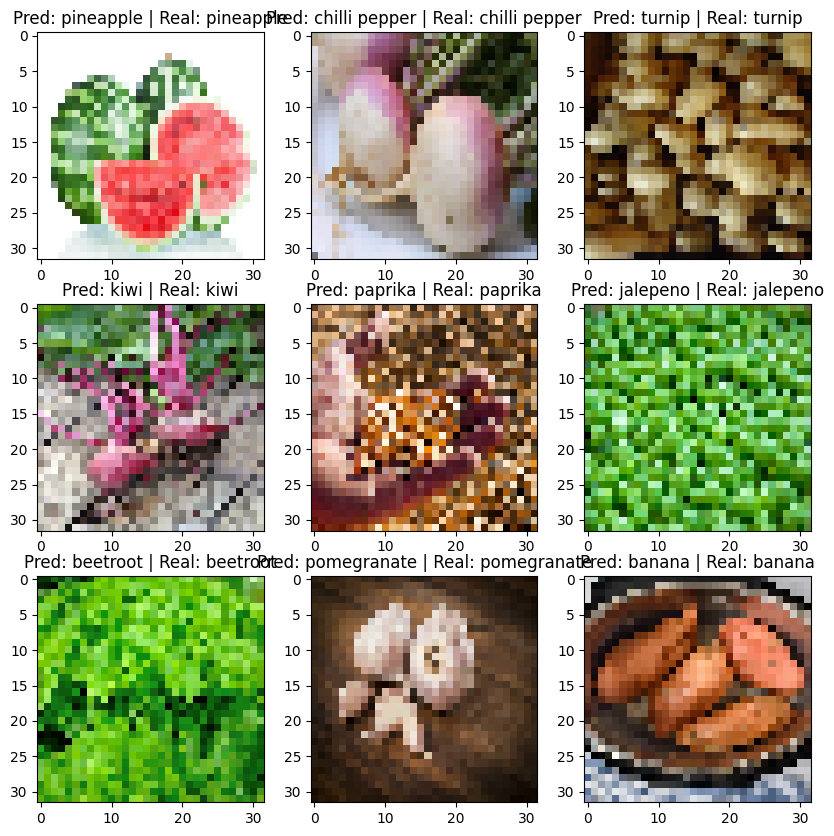

In [19]:
import numpy

plt.figure(figsize=(10,10))
for images, labels in test_ds.take(1):
  classifications = model(images)
  # print(classifications)

  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    index = numpy.argmax(classifications[i])
    plt.title("Pred: " + class_names[index] + " | Real: " + class_names[labels[i]])

In [20]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("model.tflite", 'wb') as f:
  f.write(tflite_model)